### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de la clase: 

- ¿Es una buena técnica para este tipo de problemas? ¿Por qué? 
- ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?
- Representa la matriz de correlación, ¿los datos están correlacionados?
- ¿Qué ocurre si la altura se multiplica por dos? ¿Y si se multiplica solo la edad? 

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [31]:
lista_edad_altura = [[29, 1.66], [22,1.83], [31,1.80], [27,1.75], [22,1.82], [35,1.79], [34,1.90], [26,1.78], [26, 1.64], [23, 1.74],[24,1.85], [28, 1.75], [23, 1.83],[32,1.74], [34, 1.57], [27, 1.58],[38,1.70],[22, 1.79]]

In [32]:
edad = []
altura = []
for i in lista_edad_altura:
    edad.append(i[0])
    altura.append(i[1])

In [33]:
print(edad)

[29, 22, 31, 27, 22, 35, 34, 26, 26, 23, 24, 28, 23, 32, 34, 27, 38, 22]


In [34]:
print(altura)

[1.66, 1.83, 1.8, 1.75, 1.82, 1.79, 1.9, 1.78, 1.64, 1.74, 1.85, 1.75, 1.83, 1.74, 1.57, 1.58, 1.7, 1.79]


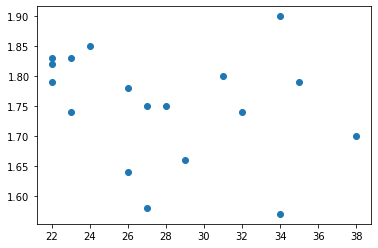

In [35]:
plt.scatter(edad, altura)

In [36]:
X = np.asarray(edad)
X = X.reshape(-1, 1)
X.shape

(18, 1)

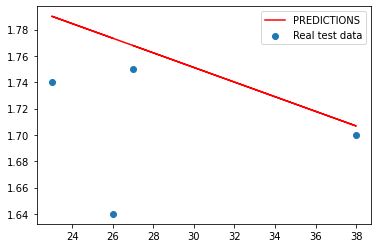

In [37]:
lin_reg = LinearRegression()
y = altura
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
lin_reg.fit(X_train, y_train ) #Entreno al modelo
y_predict = lin_reg.predict(X_test)

#Predicciones de X_test e Y_predict vs Datos reales de X_test y y_test
plt.plot(X_test,y_predict, label="PREDICTIONS", color="r")
plt.scatter(X_test, y_test, label="Real test data")
plt.legend()

1. ¿Es una buena técnica para este tipo de problemas? ¿Por qué?

No es una buena técnica para este tipo de problemas ya que no hay relación alguna entre edad y altura

In [39]:
lin_reg.score(X_test,y_test)

-1.7700497223293863

¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?

In [40]:
#Error entre el valor de la altura de testeo y el que ha predecido la maquina
for pos,val in enumerate(y_test):
    print("y_test[pos]= ",y_test[pos])
    print("y_predict[pos]", y_predict[pos])
    err = y_test[pos] - y_predict[pos]
    print("error=",err)
    print("........")

y_test[pos]=  1.75
y_predict[pos] 1.767938168846611
error= -0.017938168846610925
........
y_test[pos]=  1.7
y_predict[pos] 1.7068038049940544
error= -0.006803804994054419
........
y_test[pos]=  1.74
y_predict[pos] 1.790168846611177
error= -0.05016884661117693
........
y_test[pos]=  1.64
y_predict[pos] 1.7734958382877524
error= -0.13349583828775247
........


In [41]:
print("MAE=", mean_absolute_error(y_test, y_predict))
print("MSE=",mean_squared_error(y_test,y_predict))
print("RMSE=",np.sqrt(mean_squared_error(y_test,y_predict)))

MAE= 0.052101664684898685
MSE= 0.00517653041860305
RMSE= 0.07194810920797745


#### Representa la matriz de correlación, ¿los datos están correlacionados? :

Haciendo el mapa de correlación (abajo) y como era de esperar, vemos que los datos no están correlacionados

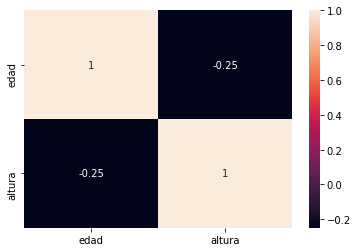

In [42]:
# Creating the graph
df = pd.DataFrame({"edad" : edad, "altura":altura})
correlation = df.corr()
heatmap = sns.heatmap(correlation,annot=True)

#### ¿Qué ocurre si la altura se multiplica por dos? ¿Y si se multiplica solo la edad?:

Al no tener correlación entre las 2 variables...si multiplicamos todas las alturas por 2, no va a mejorar.

Si se multiplica solo la edad, tampoco mejorará por el mismo motivo que antes